# Chapter 10 - Stochastic epidemic models  

```{contents} Table of Contents
:depth: 3
```

## Event-driven Approaches

Deterministic epidemic models assume that given a set of initial conditions and set of differential equations that the average number (or proportion) of individual in each disease state will be the same every time the model is implemented. 

Stochastic models, like the Reed-Frost model that we studied in the beginning of these notes, assume the number of individuals in each disease state follows a probability distribution. 
This means that if we run a model with the same initial conditions and same differential equations then we will get different outcomes. 

There are many different types of stochasticity that can be introduced into an epidemic model.
We will explore in these notes: demographic stochasticity.
**Demographic stochasticity** assumes that rates of events are constant ($\beta$, $\gamma$ etc) but that results fluctuate randomly because of the random nature of animal interactions and contact.

The suite of approaches that we will explore for including this type of stochasticity into epidemic models is called "Event-Driven simulation". 

Event driven simulation takes the following approach:
   1. Itemize all the different types of events that can occur in the model.
        1. Label the events $E_{1}, E_{2}, E_{3}, \cdots$
   2. Convert the rate at which each event occurs into a probability
   3. Choose the next event that occurs according to the probabilities in (2)
   4. Implement that event and restarts from 2-4


### Itemize SI model events

The SI model with vital dynamics is specified as 

\begin{align}
    \frac{dS}{dt} &= \mu N - \beta S \frac{I}{N} - \mu S\\
    \frac{dI}{dt} &=         \beta S \frac{I}{N} - \mu I\\
\end{align}

Lets look at all of the individual events that can occur in this model. 
**First**, a susceptible individual can be infected. 
This occurs at rate $ \beta S \frac{I}{N}$ and when this occurs the number of susceptibles decreases by one and the number of infected individuals increases by one 
**Second**, an individual can be born into the system. This occurs at rate $\mu N$ and when this happens the number of susceptibles increases by one. 
**Third**, a susceptible dies. This occurs at rate $\mu S$ and when this happens the number of susceptibles decreases by one. 
**Fourth**, an infected dies. This occurs at rate $\mu I$ and when this happens the number of infected individuals decreases by one. 

The above are the only four events we consider in our model. 


|Event|Change|Rate|
|-----|------|----|
| Sus is infected | S-1;I+1;|$ \beta S \frac{I}{N}$
| Sus born | S+1; |  $\mu N$|
| Sus die  | S-1; | $\mu S$ |
| Inf die  | I-1; |  $\mu I$ |

### Converting rates to Probabilities---The Poisson assumption (again)

Assume we have a list of potential events that can occur: $E_{1},E_{2},\cdots E_{n}$.
Further, assume that the number of events that can occur follows a Poisson distribution.
That is, the probability that $E=v$ events occurs in an interval of time $\delta t$ equals 

\begin{align}
    P(E=v) = e^{ -\lambda \delta t  } \frac{(\lambda \delta t)^{v}}{ v! }
\end{align}

The quantity $\lambda$ is the rate that events occur and has units $\frac{\text{number of occurrences}}{\text{time unit}}$. For example: number of infections per week, or number of recoveries per day, or number of births per year. 

Then the probability that a single event occurs in an interval $\delta t$ is 

\begin{align}
    P(E=1) &= e^{ -\lambda \delta t  } \frac{(\lambda \delta t)^{1}}{ 1! } \\ 
           &=e^{ -\lambda \delta t  } (\lambda \delta t) 
\end{align}

and, if the interval of time is small enough, the probability that $x>1$ events occur is exceptionally small. 

For example, the ratio of the probability that two events occur compared to one event is

\begin{align}
   \frac{P(E=2)}{P(E=1)} = \lambda \delta t 
\end{align}

which can be made arbitrarily small when we choose a small enough time interval ($ \delta t $). 

We can even look at the probability two or more events occur compare to zero or one. 

\begin{align}
   \frac{P(E>1)}{P(E=1)} &=  \frac{(1 - e^{-\lambda \delta t} - e^{-\lambda \delta t} (\lambda \delta t) )   }{e^{-\lambda \delta t} (\lambda \delta t)} \\ 
   &= \frac{e^{\lambda \delta t}}{\lambda \delta t} - \frac{1}{\lambda \delta t} - 1\\
   &\approx \frac{1 + \lambda \delta t}{\lambda \delta t} - \frac{1}{\lambda \delta t} - 1\\
   &= \frac{1 + \lambda \delta t + 1/2 (\lambda \delta t)^{2} }{\lambda \delta t} - \frac{1}{\lambda \delta t} - 1\\
   &= \frac{1}{2} (\lambda \delta t)^{2}
\end{align}

*The key is that we can link a rate, $\lambda$, to a probability via the Poisson distribution*


The probability that no event occurs equals $e^{ -\lambda \delta t  }$ and the probability that some event occurs equals $1-e^{ -\lambda \delta t  }$. 
However, because the probability that two or more events is so small we can say that the probability of one event occurring equals $1-e^{ -\lambda \delta t  }$. 

### Time until the next event occurs

The probability of an event occurring in the interval $\delta t$ equals 

\begin{align}
    P(E=1) = 1-e^{ -\lambda \delta t  } \approx \lambda \delta t 
\end{align}

and the probability that no event occurs is 

\begin{align}
    P(E=0) = e^{ -\lambda \delta t  } \approx 1- \lambda \delta t 
\end{align}

Then the probability that the next event occurs in the interval $ [(n-1)\delta t ,(n)\delta t ] $ 
means that no event occurred from time zero until time $(n-1)\delta t$ and then the event occurred. 

\begin{align}
     P(T \in [(n-1)\delta t ,(n)\delta t]) \delta t &=  \prod_{i=1}^{n-1} P(E=0) \times P(E=1) \\ 
     &= (1- \lambda \delta t)^{n-1} \times \lambda \delta t 
\end{align}

Here, we assume that the probability that an event occurs in some interval $P$ is a probability density. This means that the probability of an event is approximately $P(t) \delta t$.  

Set $(n-1)\delta t=\tau$.
If we let $\delta t$ get smaller than the number of $\delta t$ pieces to reach time $\tau$ must increase. 
In other words, as $\delta t$ shrinks, (n-1) increases as 

\begin{align}
    (1- \lambda \delta t)^{n-1}  = e^{ -\lambda t }
\end{align}

and so 

\begin{align}
    P(T \in [(n-1)\delta t ,(n)\delta t]  ) \approx  \lambda e^{ -\lambda t } 
\end{align}

This is the exponential density. 

This means that we can simulate the times until the next event from an exponential density with parameter $\lambda$ where $\lambda$ *is the summed up rates of all events*

## First Reaction method

Gillespie's First Reaction method is one way to implement an Event-Driven stochastic simulation.
Given the number of individual in each disease state at the beginning of the observational period (at time $t=t_{0}$), a stopping time ($t_{1}$), and parameter values, Gillespie's First Reaction method computes the following. 

For each possible event, draw at random the time at which that event will occur in the future.
Find the event time with the smallest time $(\delta t_{\text{event}})$. 
Implement this event by modifying the number of individuals in each disease state and increment the time by $\delta t_{\text{event}}$. 
Run the following steps until the total elapsed time is greater than the stop time $t_{1}$. 

Below is code to run the Stochastic SI model with vital dynamics. 

In [8]:
def first_reaction(stop_time=200):
    import numpy as np

    #--start time and stop time
    t         = 0
  
    #--parameter values
    params     = {"beta":0.3, "mu": 0.1}
    pop        = {"S": [100], "I":[2], "N":[102] }
    times      = [0] 
    
    while t <stop_time:   
    #for _ in range(1000):
        
        #--simulate times for all events
        S,I,N = pop.get("S"),pop.get("I"),pop.get("N")
        S     = S[-1]
        I     = I[-1]
        N     = N[-1]

        if N==0:
            break
            
        if S==0 or I==0 or N==0:
            ev1 = 0.1
        else:
            ev1 = np.random.exponential( 1./(params["beta"]*S*I/N )) #--time for event 1

        if N==0:
            ev2 =0.1
        else:
            ev2 = np.random.exponential( 1./(params["mu"] * N) )     #--time for event 2

        if S == 0:
            ev3 = 0.1
        else:
            ev3 = np.random.exponential( 1./(params["mu"] * S) )     #--time for event 3
        if I==0:
            ev4=0.1
        else:
            ev4 = np.random.exponential( 1./(params["mu"] * I) )     #--time for event 4
    
        first_event_to_occur = np.argmin([ev1,ev2,ev3,ev4])          #--Find the "soonest" event time

        #--Implement the event by changing disease states
        if first_event_to_occur==0:
            S       = np.max( [S-1, 0]) 
            I       = I+1 
            delta_T = ev1
        elif first_event_to_occur==1:
            S       = S+1 
            delta_T = ev2
        elif first_event_to_occur==2:
            S       = np.max( [S-1, 0]) 
            delta_T = ev3
        elif first_event_to_occur==3:
            I       = np.max( [I-1, 0]) 
            delta_T = ev4
            
        #--Update numbers in each disease
        pop["S"].append(S)
        pop["I"].append(I)
    
        #--Update pop size 
        N = S+I
        pop["N"].append(N)
    
        #--Update time
        t+=delta_T
        times.append(t)

    return times,pop

times,pop = first_reaction(100)

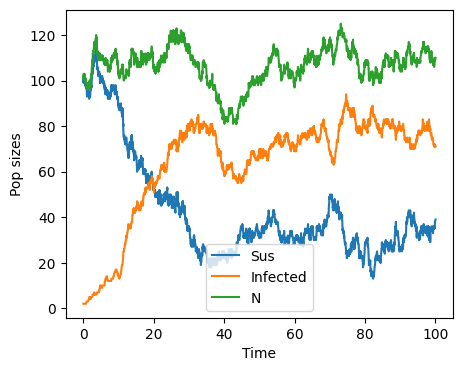

In [9]:
import matplotlib.pyplot as plt 
fig,ax = plt.subplots(figsize=(5,4))

Ss = pop["S"]
ax.plot(times,Ss,label="Sus")    

Is = pop["I"]
ax.plot(times,Is,label="Infected")    

Ns = pop["N"]
ax.plot(times,Ns,label="N")    

ax.set_xlabel("Time")
ax.set_ylabel("Pop sizes")

ax.legend()

plt.show()

**Differences between deterministic and stochastic models**
Some important differences appear between the deterministic and stochastic version of the SI model with vital dynamics. 
First, the number of individuals does not stay constant. We see that $N$ fluctuates towards values larger and smaller than the original population size of 101. 
Like in the deterministic model, the number of infected does grow towards a fixed point and the number of susceptible are depleted, moving towards zero. 

The stochastic values above were from a single "experiment".
To get a sense of the probability of the disease states, *S* and *I*, we need to run our model many times (say $M$ times).
If we run our model $M$ times then we can use the simulated values at time $t$ to estimate the probability of $S(t)$ and the probability of $I(t)$.

Below is an example of $M=100$ simulations. 
We plot the median, 2.5, and 97.5th percentiles for $S$ and $I$.

In [10]:
from scipy.interpolate import interp1d
import numpy as np

observation_periods = np.arange(100)

infects = np.zeros((100,100))
susceps = np.zeros((100,100))

for sim in range(100):
    times,pop     = first_reaction(100)

    infectors      = np.array(pop["I"])
    sus            = np.array(pop["S"])
    
    f              = interp1d(times,infectors)
    infects[sim,:] = f(observation_periods)

    f              = interp1d(times,sus)
    susceps[sim,:] = f(observation_periods)

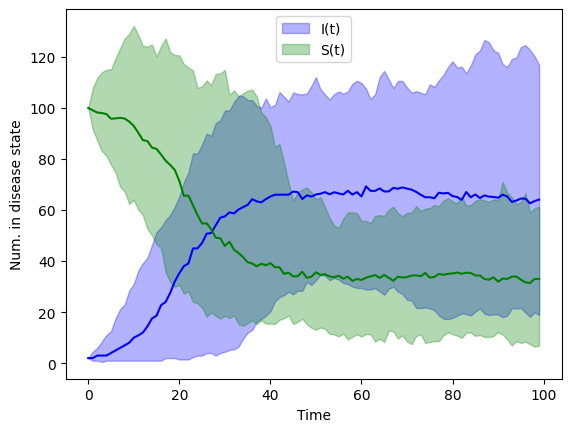

In [11]:
fig,ax = plt.subplots()

lower,median,upper = np.percentile( infects, [2.5,50,97.5], axis=0 )
ax.plot( observation_periods, median, color="blue" )
ax.fill_between( observation_periods, lower,upper, color="blue",alpha=0.30,label="I(t)" )

lower,median,upper = np.percentile( susceps, [2.5,50,97.5], axis=0 )
ax.plot( observation_periods, median, color="green" )
ax.fill_between( observation_periods, lower,upper, color="green",alpha=0.30,label="S(t)" )

ax.set_xlabel("Time")
ax.set_ylabel("Num. in disease state")

ax.legend()

plt.show()

## Direct method

Gillespie's First Reaction Method asks us to produce random times for each event type and then suppose that the even which take place is the event that has happened "soonest".
Another method for implementing an event-driven stochastic model is Gillespie's Direct Method. 

Gillespie's Direct Method supposes the following steps:
1. Initiate the model with a start ($t_{0}$) and end time ($t_{1}$), parameters, and disease states
2. Enumerate all the events $E_{1}$,$E_{2}$, etc.
3. Add all the rates for all the events and call this $T$
4. Draw a random time that one of the events occurs from $\delta t = exp(T)$
5. Choose which event will occur. The probability that event occurs ($P(E_{i})$) equals $r(E_{i})/T$ where $r(E_{i})$ is the rate of event $i$.
6. Increment time by $\delta t$ and run steps 4-6 until stop time. 





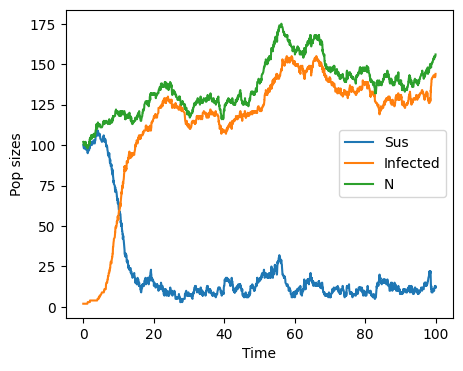

In [12]:
def direct_reaction(stop_time=200):
    import numpy as np

    #--start time and stop time
    t         = 0
  
    #--parameter values
    params     = {"beta":0.6, "mu": 1./20}
    pop        = {"S": [100], "I":[2], "N":[102] }
    times      = [0] 
    
    while t <stop_time:        
        
        #--simulate times for all events
        S,I,N = pop.get("S"),pop.get("I"),pop.get("N")
        S     = S[-1]
        I     = I[-1]
        N     = N[-1]

        #--time of the next event 
        rate1 = np.clip( (params["beta"]*S*I/N ),0.01,np.inf) #clipping so that these rate are not negative
        rate2 = np.clip( (params["mu"] * N)     ,0.01,np.inf)
        rate3 = np.clip( (params["mu"] * S)     ,0.01,np.inf)
        rate4 = np.clip( (params["mu"] * I)     ,0.01,np.inf)
        
        T       =  rate1 + rate2 + rate3 + rate4

        if T==0:
            break
        
        delta_T = np.random.exponential(1./T)

        #--choose which event occurs 
        if S==0 or I==0 or N==0:
            p_event1 = 0
        else:
            p_event1 = rate1/T #--time for event 1

        if N==0:
            p_event2 =0
        else:
            p_event2 = rate2/T     #--time for event 2

        if S == 0:
            p_event3 = 0
        else:
            p_event3 = rate3/T     #--time for event 3

        if I==0:
            p_event4=0
        else:
            p_event4 = rate4/T     #--time for event 4

        probs = np.array([p_event1,p_event2,p_event3,p_event4])
        
        #--Find the event that occurs
        event_to_occur = np.random.choice( np.arange(4), p = probs/probs.sum() )     
        
        #--Implement the event by changing disease states
        if event_to_occur==0:
            S       = np.max( [S-1, 0]) 
            I       = I+1 
        elif event_to_occur==1:
            S       = S+1 
        elif event_to_occur==2:
            S       = np.max( [S-1, 0]) 
        elif event_to_occur==3:
            I       = np.max( [I-1, 0]) 
            
        #--Update numbers in each disease
        pop["S"].append(S)
        pop["I"].append(I)
    
        #--Update pop size 
        N = S+I
        pop["N"].append(N)
    
        #--Update time
        t+=delta_T
        times.append(t)
    
    return times,pop

times,pop = direct_reaction(100)

fig,ax = plt.subplots(figsize=(5,4))

Ss = pop["S"]
ax.plot(times,Ss,label="Sus")    

Is = pop["I"]
ax.plot(times,Is,label="Infected")    

Ns = pop["N"]
ax.plot(times,Ns,label="N")    

ax.set_xlabel("Time")
ax.set_ylabel("Pop sizes")

ax.legend()

plt.show()

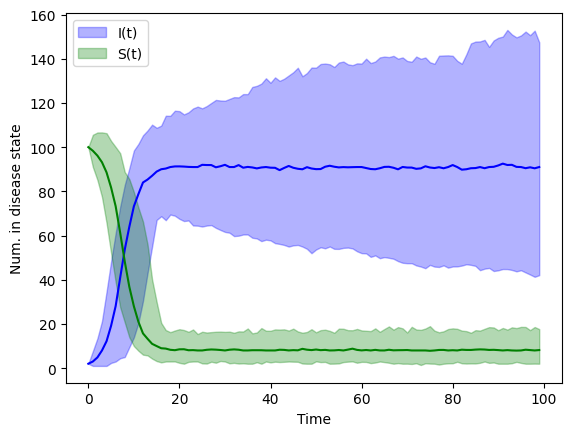

In [13]:
from scipy.interpolate import interp1d

observation_periods = np.arange(100)

infects = np.zeros((300,100))
susceps = np.zeros((300,100))

for sim in range(300):
    times,pop = direct_reaction(100)

    infectors = np.array(pop["I"])
    sus       = np.array(pop["S"])
    
    f = interp1d(times,infectors)
    infects[sim,:] = f(observation_periods)

    f = interp1d(times,sus)
    susceps[sim,:] = f(observation_periods)
    
fig,ax = plt.subplots()

lower,median,upper = np.percentile( infects, [2.5,50,97.5], axis=0 )
ax.plot( observation_periods, median, color="blue" )
ax.fill_between( observation_periods, lower,upper, color="blue",alpha=0.30,label="I(t)" )

lower,median,upper = np.percentile( susceps, [2.5,50,97.5], axis=0 )
ax.plot( observation_periods, median, color="green" )
ax.fill_between( observation_periods, lower,upper, color="green",alpha=0.30,label="S(t)" )

ax.set_xlabel("Time")
ax.set_ylabel("Num. in disease state")

ax.legend()

plt.show()

## Tau-leap method

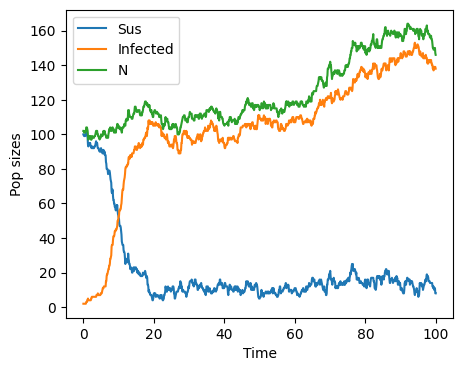

In [14]:
def tau_leap_method(stop_time=200):
    import numpy as np

    #--start time and stop time
    t         = 0
    deltat    = 1./10
  
    #--parameter values
    params     = {"beta":0.6, "mu": 1./20}
    pop        = {"S": [100], "I":[2], "N":[102] }

    times=np.arange(t,stop_time,deltat)
    for time in times[1:]:       
        
        #--simulate times for all events
        S,I,N = pop.get("S"),pop.get("I"),pop.get("N")
        S     = S[-1]
        I     = I[-1]
        N     = N[-1]

        #--time of the next event 
        rate1 = np.clip( (params["beta"]*S*I/N ),0,np.inf) #clipping so that these rate are not negative
        rate2 = np.clip( (params["mu"] * N)     ,0,np.inf)
        rate3 = np.clip( (params["mu"] * S)     ,0,np.inf)
        rate4 = np.clip( (params["mu"] * I)     ,0,np.inf)
        
        delta_rate1 = np.random.poisson( rate1*deltat )
        delta_rate2 = np.random.poisson( rate2*deltat )
        delta_rate3 = np.random.poisson( rate3*deltat )
        delta_rate4 = np.random.poisson( rate4*deltat )

        S       = S -  delta_rate1 + delta_rate2 - delta_rate3
        I       = I + delta_rate1 - delta_rate4
                    
        #--Update numbers in each disease
        pop["S"].append(S)
        pop["I"].append(I)
    
        #--Update pop size 
        N = S+I
        pop["N"].append(N)
    
    return times,pop

times,pop = tau_leap_method(100)

fig,ax = plt.subplots(figsize=(5,4))

Ss = pop["S"]
ax.plot(times,Ss,label="Sus")    

Is = pop["I"]
ax.plot(times,Is,label="Infected")    

Ns = pop["N"]
ax.plot(times,Ns,label="N")    

ax.set_xlabel("Time")
ax.set_ylabel("Pop sizes")

ax.legend()

plt.show()

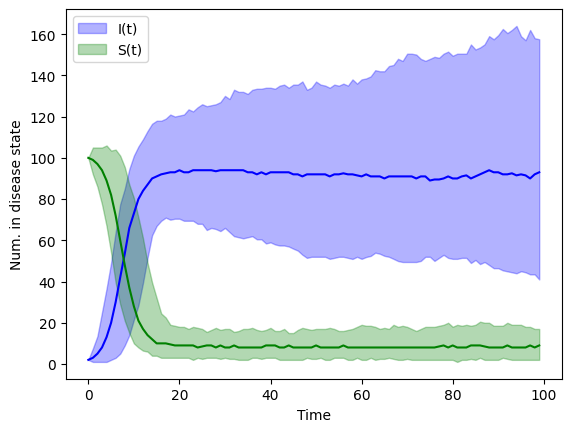

In [15]:
from scipy.interpolate import interp1d

observation_periods = np.arange(100)

infects = np.zeros((300,100))
susceps = np.zeros((300,100))

for sim in range(300):
    times,pop = tau_leap_method(100)

    infectors = np.array(pop["I"])
    sus       = np.array(pop["S"])
    
    f = interp1d(times,infectors)
    infects[sim,:] = f(observation_periods)

    f = interp1d(times,sus)
    susceps[sim,:] = f(observation_periods)
    
fig,ax = plt.subplots()

lower,median,upper = np.percentile( infects, [2.5,50,97.5], axis=0 )
ax.plot( observation_periods, median, color="blue" )
ax.fill_between( observation_periods, lower,upper, color="blue",alpha=0.30,label="I(t)" )

lower,median,upper = np.percentile( susceps, [2.5,50,97.5], axis=0 )
ax.plot( observation_periods, median, color="green" )
ax.fill_between( observation_periods, lower,upper, color="green",alpha=0.30,label="S(t)" )

ax.set_xlabel("Time")
ax.set_ylabel("Num. in disease state")

ax.legend()

plt.show()

# Stochastic extinction 